<a href="https://colab.research.google.com/github/VectorJamo/Deep-Learning/blob/main/03_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification with PyTorch

1. Classification dataset

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
sample_size = 1000

# Create circles
X, y = make_circles(sample_size, noise=0.03, random_state=42)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f'First 5 samples of X: {X[:5]}')
print(f'First 5 samples of y: {y[:5]}')

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

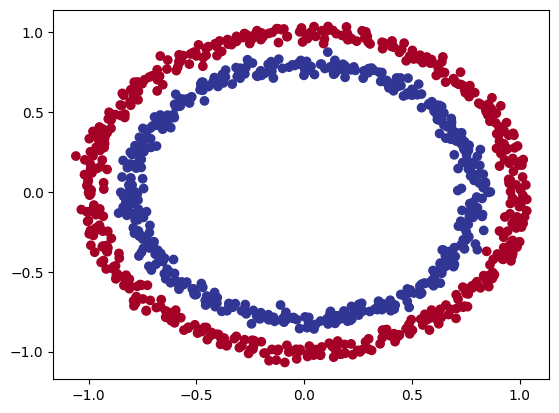

In [ ]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Turn Data Into Tensors and Create Train and Test Splits

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch
from torch import nn
torch.__version__

'2.5.1+cu124'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Convert numpy arrays into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape, y_test.shape

(torch.Size([200, 2]), torch.Size([200]))

**Building a Model**

In [ ]:
# Pick a device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Create a NN with 2 layers
    self.layer_1 = nn.Linear(in_features=2, out_features=6) # Takes in 2 features and outputs 6 features
    self.layer_2 = nn.Linear(in_features=6, out_features=7) # Takes in 6 features and outputs 7 features
    self.layer_3 = nn.Linear(in_features=7, out_features=1) # Takes in 7 features from the previous layer and outputs 1 feature

  # Define the forward computation steps in our Model
  def forward(self, x):
    output1 = self.layer_1(x)# First, pass a training example through layer 1
    output2 = self.layer_2(output1)
    output = self.layer_3(output2)
    return output

model = CircleModel().to(device)
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=7, bias=True)
  (layer_3): Linear(in_features=7, out_features=1, bias=True)
)

In [ ]:
# First, pass a training example through layer 1 and then the output of the layer 1 to layer 2# First, pass a training example through layer 1 and then the output of the layer 1 to layer 2# First, pass a training example through layer 1 and then the output of the layer 1 to layer 2# First, pass a training example through layer 1 and then the output of the layer 1 to layer 2# First, pass a training example through layer 1 and then the output of the layer 1 to layer 2device

Replicate the model above with `nn.sequential`. Since it is a sequential, any data example will go through sequentially(one by one). So, there is no need to provide a forward() method(the forward pass will go on in the order we set the layers).

Making some **predictions before training the model**

In [ ]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.5224,  0.0958,  0.3410, -0.0998,  0.5451,  0.1045], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.1906,  0.1041, -0.1881, -0.0479, -0.1658,  0.2708],
                      [-0.3223, -0.1882, -0.1153, -0.2455,  0.0385, -0.4032],
                      [ 0.3687, -0.3468,  0.3152,  0.0679, -0.1326,  0.2523],
                      [ 0.0636,  0.3298,  0.0446, -0.1288,  0.1097, -0.1107],
                      [ 0.1718,  0.3645,  0.2360, -0.1785,  0.2357,  0.0730],
                      [ 0.2073, -0.2488, -0.4041, -0.1577, -0.3131,  0.3350],
                      [ 0.1176,  0.1691,  0.1291, -0.0071,  0.3195, -0

In [ ]:
# Send our model to the GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [ ]:
# Making predictions before training the model
with torch.no_grad():
  untrained_preds = model(X_test)
  print(f"Length of testing data: {len(X_test)}. Shape of testing data: {X_test.shape}")
  print(f"Length of predictions: {len(untrained_preds)}. Shape of predictions: {untrained_preds.shape}")


Length of testing data: 200. Shape of testing data: torch.Size([200, 2])
Length of predictions: 200. Shape of predictions: torch.Size([200, 1])


In [ ]:
X_test[:10], torch.round(untrained_preds[:10])

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]], device='cuda:0'),
 tensor([[-0.],
         [-0.],
         [-1.],
         [-0.],
         [-1.],
         [-1.],
         [-0.],
         [-0.],
         [-1.],
         [-0.]], device='cuda:0'))

Setting up the **loss function** and the **optimizer**

In [ ]:
# Create the loss function

# For all the theory and reasons of why we are using this loss function, head over to my handwritten notes.
# But, in short, BCEWithLogits loss sends the logits through a sigmoid function first to get the probability value between (0, 1) and then
# computes the binary cross entropy loss which is just the negative of the log likelihood function.
# However, for learning, we will pass the output of the forward pass(logits) through a sigmoid function ourselves so we will use just BCELoss() which
# only computes the binary cross entropy loss.
loss_function = nn.BCEWithLogitsLoss()

# Create the optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

Calculating model's **accuracy**

In [ ]:
def calculate_accuracy(y_pred, y_true):
  # torch.eq(y_pred, y_true) returns a tensor of booleans of same shape as y_pred and y_true containing True if the two values in the tensors at that location is equal and False if they are not.
  # .sum() caluclates the sum of the values of the tensor(True = 1, False = 0).
  # .item() returns the value as a regular python integer.
  num_correct = torch.eq(y_pred, y_true).sum().item()
  accuracy = float(num_correct/len(y_true))*100.0
  return accuracy

Converting the **Logits** to **Prediction Probabilities** and then **Prediction Labels**


In [ ]:
# The output of the forward pass, before any activation function like sigmoid or softmax is applied is known as "Logits". If you need a refresher in depth about what Logits are and what these
# activation functions do, head over to my handwritten notes.
model.eval()

with torch.no_grad():
  y_preds = model(X_train)[:5]

y_preds

tensor([[-0.5046],
        [-0.5502],
        [-0.6707],
        [-0.6811],
        [-0.4155]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
# Use the sigmoid activation function on the logits and map them to Prediction Probabilities (0, 1)
y_pred_probs = torch.sigmoid(y_preds)
y_pred_probs

tensor([[0.3764],
        [0.3658],
        [0.3383],
        [0.3360],
        [0.3976]], device='cuda:0')

In [ ]:
# Round the probability values to 0 or 1 to get the Prediction Labels
y_pred_labels = torch.round(y_pred_probs)
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

Training the **Model**

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
epochs = 2000
for i in range(0, epochs):
  model.train() # Put the model in training mode

  # Forward pass
  logits = model(X_train).squeeze()

  # Pass through the sigmoid function to get the prediction probabilities
  y_pred_probs = torch.sigmoid(logits)

  # Get the loss
  loss = loss_function(logits, y_train)

  # Clear the gradients stored in the parameters(weights and biases) from previous loss.backward()
  optimizer.zero_grad()

  # Backpropagation to compute the partial derivatives of the loss function with respect to the weights and biases and store them as gradients in those parameters
  loss.backward()

  # Update the model parameters based on their gradients
  optimizer.step()

  # Test the model on training data to get the accuracy
  with torch.no_grad():
    model.eval() # Put the model in evaluation mode

    logits = model(X_test).squeeze()
    y_pred_probs = torch.sigmoid(logits)
    y_label_pred = torch.round(y_pred_probs)

    accuracy = calculate_accuracy(y_pred=y_label_pred, y_true=y_test)
    if i%100 == 0:
      print(f'R: {i + 10}. Loss: {loss.item()}. Accuracy: {accuracy}')


R: 10. Loss: 0.7275825142860413. Accuracy: 50.0
R: 110. Loss: 0.693871796131134. Accuracy: 46.5
R: 210. Loss: 0.6932071447372437. Accuracy: 46.5
R: 310. Loss: 0.6930418014526367. Accuracy: 47.0
R: 410. Loss: 0.6929970979690552. Accuracy: 45.5
R: 510. Loss: 0.6929845809936523. Accuracy: 46.0
R: 610. Loss: 0.6929812431335449. Accuracy: 45.5
R: 710. Loss: 0.692980170249939. Accuracy: 45.5
R: 810. Loss: 0.6929798722267151. Accuracy: 45.5
R: 910. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1010. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1110. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1210. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1310. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1410. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1510. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1610. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1710. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1810. Loss: 0.6929798722267151. Accuracy: 46.0
R: 1910. Loss: 0.6929798722267151. Accuracy: 46.0


### Adding non-linearity

Raw NNs with no activation functions is just a linear transformation of the input data. **If you lay out all the equations of the neurons in a raw NN, you see that it is just an equation of a straight line. However, there may not be a straight line that perfectly divides the different classes.** Therefore, for decision boundaries that are not linear, we need to use **activation functions**. Activation functions like `relU` or `tanH` in the hidden layers can simulate any sort of a continuous function. Therefore, our decision boundary can be of any shape or form.

For more explanation, head over to my handwritten notes.

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Create a NN with 2 layers
    self.layer_1 = nn.Linear(in_features=2, out_features=6) # Takes in 2 features and outputs 6 features
    self.layer_2 = nn.Linear(in_features=6, out_features=7) # Takes in 6 features and outputs 7 features
    self.layer_3 = nn.Linear(in_features=7, out_features=1) # Takes in 7 features from the previous layer and outputs 1 feature
    self.relu = nn.ReLU() # ReLU(input) = max(0, input)

  # Define the forward computation steps in our Model
  def forward(self, x):
    output1 = self.relu(self.layer_1(x)) # First, pass a training example through layer 1 and then the outputs of that layer though the ReLU activation function
    output2 = self.relu(self.layer_2(output1)) # Then, from layer 1 to layer 2
    output = self.layer_3(output2) # Finally, to layer 3
    return output

model = CircleModelV1().to(device)
model

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=7, bias=True)
  (layer_3): Linear(in_features=7, out_features=1, bias=True)
  (relu): ReLU()
)

Train the new model with added **linearility**

In [ ]:
# Loss function and the optimizer
loss_function = nn.BCEWithLogitsLoss()

# Create the optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [ ]:
epochs = 2000
for i in range(0, epochs):
  model.train() # Put the model in training mode

  # Forward pass
  logits = model(X_train).squeeze()

  # Pass through the sigmoid function to get the prediction probabilities
  y_pred_probs = torch.sigmoid(logits)

  # Get the loss
  loss = loss_function(logits, y_train)

  # Clear the gradients stored in the parameters(weights and biases) from previous loss.backward()
  optimizer.zero_grad()

  # Backpropagation to compute the partial derivatives of the loss function with respect to the weights and biases and store them as gradients in those parameters
  loss.backward()

  # Update the model parameters based on their gradients
  optimizer.step()

  # Test the model on training data to get the accuracy
  with torch.no_grad():
    model.eval() # Put the model in evaluation mode

    logits = model(X_test).squeeze()
    y_pred_probs = torch.sigmoid(logits)
    y_label_pred = torch.round(y_pred_probs)

    accuracy = calculate_accuracy(y_pred=y_label_pred, y_true=y_test)
    if i%100 == 0:
      print(f'R: {i + 10}. Loss: {loss.item()}. Accuracy: {accuracy}')

R: 10. Loss: 0.7331091165542603. Accuracy: 50.0
R: 110. Loss: 0.6946240663528442. Accuracy: 46.5
R: 210. Loss: 0.6936926245689392. Accuracy: 46.0
R: 310. Loss: 0.6930021643638611. Accuracy: 56.00000000000001
R: 410. Loss: 0.6923657059669495. Accuracy: 54.0
R: 510. Loss: 0.6918672323226929. Accuracy: 54.0
R: 610. Loss: 0.6913191080093384. Accuracy: 55.00000000000001
R: 710. Loss: 0.6906661987304688. Accuracy: 55.50000000000001
R: 810. Loss: 0.6898030042648315. Accuracy: 55.50000000000001
R: 910. Loss: 0.6886529922485352. Accuracy: 55.50000000000001
R: 1010. Loss: 0.6870373487472534. Accuracy: 56.99999999999999
R: 1110. Loss: 0.6841339468955994. Accuracy: 58.5
R: 1210. Loss: 0.6808568239212036. Accuracy: 58.5
R: 1310. Loss: 0.6761606335639954. Accuracy: 60.5
R: 1410. Loss: 0.6690604090690613. Accuracy: 65.0
R: 1510. Loss: 0.6567304730415344. Accuracy: 73.0
R: 1610. Loss: 0.6364994645118713. Accuracy: 82.0
R: 1710. Loss: 0.602117657661438. Accuracy: 86.0
R: 1810. Loss: 0.5458840727806091.

### Putting it altogether with a **multi-class classification problem**

First we need some multi-class data. We will be using scikitlearn's built in make_blobs() function. This will create data points of as many classes as we want by modifying the `center` argument

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
num_classes = 4
num_features = 2
data_noise = 1.2
random_seed = 42

In [ ]:
# Create the multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=num_features, centers=num_classes, cluster_std=data_noise, random_state=random_seed)

In [ ]:
# Turn the data into tensors
X_blob.shape, y_blob.shape

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=random_seed)
X_train.size(), X_test.size()

(torch.Size([800, 2]), torch.Size([200, 2]))

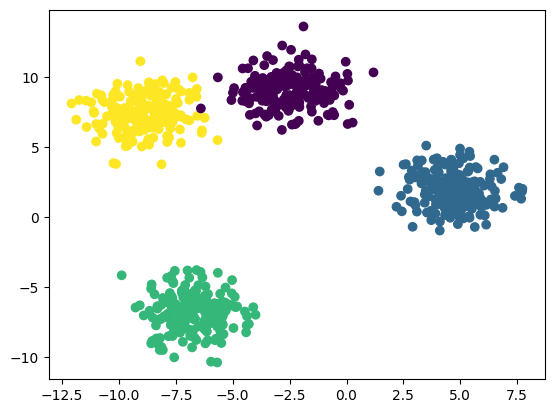

In [ ]:
# Visualize the data
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train)

In [ ]:
# Creating the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class MultiClassModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=6),
        nn.ReLU(),
        nn.Linear(in_features=6, out_features=7),
        nn.ReLU(),
        nn.Linear(in_features=7, out_features=4) # Out features should be the same as the number of classes
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
model = MultiClassModel().to(device)

Create the **loss function** and the **optimizer**.

In multiclass classification, the final layer's activation function is the **softmax** activation function. The softmax activation function takes an input of size n (the logits), and outputs a size n array containing the probabilities of each class. The mathematics behind how it does it is actually really simple.

Head over to my handwritten notes if you need a quick refresher.

Also, for multiclass problem, instead of binary cross entropy, we will use **cross entropy loss**

In [ ]:
# Loss function
loss_function = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# Sending our data to the appropriate device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

Let's see the softmax activation function in action

In [ ]:
# Compute the output of the final layer (logits) for a single training example
logits = model(X_train[0])
logits

tensor([-0.0281, -0.1495,  0.2341, -0.1957], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [ ]:
# Pass the logits through the softmax function
y_pred_probs = torch.softmax(logits, dim=0)
y_pred_probs

tensor([0.2481, 0.2197, 0.3224, 0.2098], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

The outputs of the final layer is now mapped into a probability value of (0, 1). We see that the logit with the greatest value has the greatest probability and the logit with the smallest value has the least probability. So, it is just a simple mapping. Therefore, if we were just predicting using the model, we don't need the softmax activation. The softmax activation's probabilistic output is needed by the loss function (which uses the likelihood function under it) to compute the loss during training.

Since the softmax function just computes the probability of each class with respect to other classes, the sum of the output of the softmax function is always 1 for a single training example.

In [ ]:
y_pred_probs.sum()

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
# Now, to return the predicted class, we return the index of the element in the array with the greatest probability.
torch.argmax(y_pred_probs)

tensor(2, device='cuda:0')

**Training the model**

In [ ]:
torch.manual_seed(42)

epochs = 100
for i in range(0, epochs):
  model.train()
  # Forward pass
  logits = model(X_train).squeeze()

  # Compute the loss. CrossEntropyLoss in PyTorch automatically converts the logits into prediction probabilites by applying the softmax activation function inside.
  loss = loss_function(logits, y_train)

  # Clear the gradients stored in the model parameters from previous training round.
  optimizer.zero_grad()

  # Backpropagation.
  loss.backward()

  # Update the model's parameters based on the gradients
  optimizer.step()

  # Test
  model.eval()

  with torch.no_grad():
    logits = model(X_test) # Returns a tensor of a vector of logits

    pred_probs = torch.softmax(logits, dim=0) # Returns a tensor of a vector of those logits converted into prediction probabilites for each class by applying the softmax function
    pred_class = pred_probs.argmax(dim=1) # dim=1 means do the argmax for the second(inner) dimension. For each of those vector of prediction probabilities INSIDE the tensor(hence, dim=1), get the index of the element with
    # the greatest probability.

    test_accuracy = calculate_accuracy(y_pred=pred_class, y_true=y_test)

    if i%10 == 0:
      print(f"R: {i}. Train Loss: {loss.item()}. Test accuracy: {test_accuracy}")

R: 0. Train Loss: 1.468027949333191. Test accuracy: 23.5
R: 10. Train Loss: 1.1448378562927246. Test accuracy: 47.5
R: 20. Train Loss: 1.0515263080596924. Test accuracy: 47.5
R: 30. Train Loss: 1.0076161623001099. Test accuracy: 47.0
R: 40. Train Loss: 0.9775826930999756. Test accuracy: 47.0
R: 50. Train Loss: 0.9350364208221436. Test accuracy: 57.99999999999999
R: 60. Train Loss: 0.8564333319664001. Test accuracy: 81.5
R: 70. Train Loss: 0.7506409287452698. Test accuracy: 85.0
R: 80. Train Loss: 0.6716897487640381. Test accuracy: 85.0
R: 90. Train Loss: 0.6097838878631592. Test accuracy: 84.0
